<h1> Практическая работа №3</h1>
<p>КИ21-17/1б Самарин Никита</p>


### Цель: знакомство с методами обработки изображений,
формирование навыков выполнения обработки изображений на
языке Python.
### Задачи:
<p>Выполнение практической работы предполагает решение следующий задач:</p>

1. Исследование методов обработки изображений
2. Исследование детекторов и дескрипторов ключевых точек
3. Реализация моделей и алгоритмов распознавания объектов на изображении

<p>Общая последовательность действий:</p>

1. Подготовить изображения для исследования

2. Исследовать методы обработки изображений

    1. Обработать изображения с помощью методов геометрического преобразования (аффинные преобразования: сдвиг, поворот, изменение масштаба, проективные преобразования, отражение относительно горизонтали или вертикали). Обработать изображения с помощью методов преобразования яркости и контраста.
    2. Обработать изображения разными методами фильтрации (низкочастотные фильтры, нелинейные фильтры). Исследовать работу фильтров для разных видов шумов (гауссовский, импульсный шум типа «соль», импульсный шум типа «перец», импульсный шум со случайным значением импульсов). Оценить качество восстановления изображения (например, с  помощью метрики «пиковое отношение сигнал-шум» (peak signal-to-noise ratio, PSNR)).
    3. Получить контурные изображения различными методами выделения контуров (высокочастотные фильтры: Робертса, Превитта, Собела, Лапласа, метод Кэнни). Исследовать качество выделения контуров в зависимости от выбора порога. Определить, при каком значении порога качество контурного изображения будет наилучшее. Качество контурного изображения можно оценить визуально и с помощью среднеквадратичной ошибки (для вычисления критерия необходимо сравнить сформированное контурное изображение с идеальным). Исследовать качество выделения контуров от уровня шума.

3. Исследование детекторов и дескрипторов
    1. Обработать изображения с помощью разных методов поиска ключевых точек (SIFT, SURF, BRISK, ORB). Отобразить ключевые точки на изображении. Выполнить поиск похожих объектов с помощью дескрипторов данных методов на других изображениях (изображения без и со схожими объектами). Исследовать инвариантность методов относительно преобразования исходного изображения (смещение, поворот, изменение масштаба, изменение яркости, изменение точки положения камеры).

4. Решение задачи распознавания фотографий газетных судоку, сделанных с помощью смарфона. Поле судоку представляет собой сетку размером 9 × 9. Каждая ячейка может быть пустой или содержать значение от 1 до 9.
    1. Разработать алгоритм распознавания сетки судоку. Визуализировать результат работы алгоритмы
    2. Разработать модель распознавания цифр в ячейках сетки судоку. В качестве данных для обучения использовать базу данных MNIST. Для извлечения признаков из данных использовать гистограммы ориентированных градиентов (HOG, SIFT, SURF). Построить модели классификаторов, оценить качество их работы.

##### 1. Подготовить изображения для исследования
Изображения были взяты из датасета "Car Brands Images" с сайта kaggle
<!-- ["Butterfly Image Classification"](https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification/) -->


#### 2. Исследовать методы обработки изображений


##### 2.1 Обработать изображения с помощью методов геометрического преобразования (аффинные преобразования: сдвиг, поворот, изменение масштаба, проективые преобрназования, отражение относительно горизонтали или вертикали). Обработать изображения с помощью методов преобразования яркости и контраста.

In [122]:
import random
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

import albumentations as A

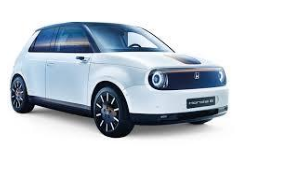

In [123]:
img_path = "Honda_001.jpg"
image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(image)

In [124]:
transform = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=45, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5, p=1),
    A.Perspective(scale=(0.05, 0.1), p=0.5)
])


A.ShiftScaleRotate - выполняет случайный сдвиг, масштабирование и поворот изображения.

A.HorizontalFlip и A.VerticalFlip - выполняют отражение изображения по горизонтали и вертикали соответственно.

A.RandomBrightnessContrast - изменяет яркость и контраст изображения.

A.Perspective - выполняет проективные преобразования изображения.

Параметр `p` в каждом преобразовании определяет вероятность его применения к изображению.

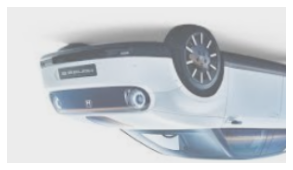

In [125]:
augmented_image = transform(image=image)['image']
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(augmented_image)

#### 2.2 Обработать изображения разными методами фильтрации (низкочастотные фильтры, нелинейные фильтры). Исследовать работу фильтров для разных видов шумов (гауссовский, импульсный шум типа «соль», импульсный шум типа «перец», импульсный шум со случайным значением импульсов). Оценить качество восстановления изображения (например, с помощью метрики «пиковое отношение сигнал-шум» (peak signal-to-noise ratio, PSNR)).

In [126]:
import cv2
import numpy as np

psnr гауссовский шум - GaussianBlur -> 20.70643907742154
psnr гауссовский шум - medianBlur -> 21.843535141406747
psnr шум "соль" - GaussianBlur -> 23.75092676416323
psnr шум "соль" - medianBlur -> 24.192280064359522
psnr_шум "перец" - GaussianBlur -> 21.192965158657465
psnr шум "перец" - medianBlur -> 24.171264759812814


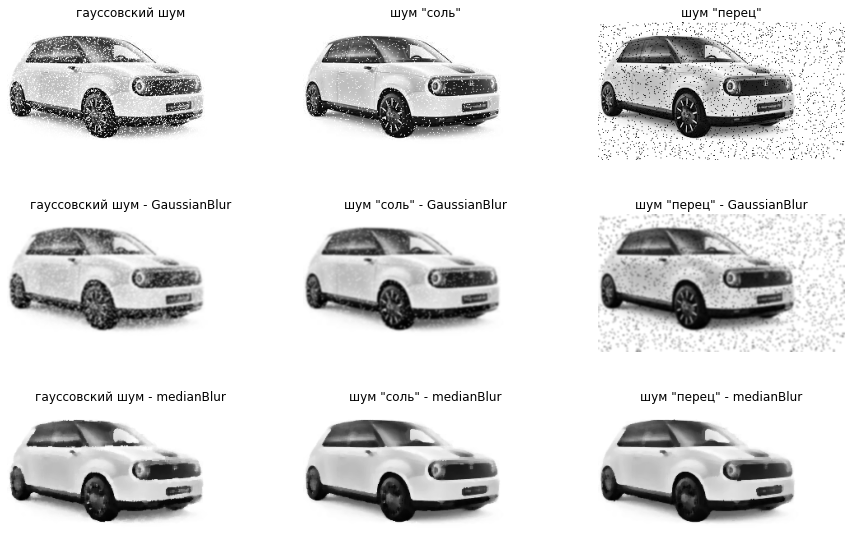

In [127]:
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

mean = 0
stddev = 1
noise = np.random.normal(mean, stddev, image.shape).astype(np.uint8)
image_with_gaussian_noise = cv2.add(image, noise)

gaussian_blur_filter_on_gaus = cv2.GaussianBlur(image_with_gaussian_noise, (5, 5), 0)
psnr_blurred = cv2.PSNR(image, gaussian_blur_filter_on_gaus)
print(f"psnr гауссовский шум - GaussianBlur -> {psnr_blurred}")

median_blur_filter_on_gaus = cv2.medianBlur(image_with_gaussian_noise, 5)
psnr_median = cv2.PSNR(image, median_blur_filter_on_gaus)
print(f"psnr гауссовский шум - medianBlur -> {psnr_median}")

num_salt = np.ceil(0.05 * image.size)
x_coords = np.random.randint(0, image.shape[0], int(num_salt))
y_coords = np.random.randint(0, image.shape[1], int(num_salt))
image_with_salt_noise = image.copy()
image_with_salt_noise[x_coords, y_coords] = 255

gaussian_blur_filter_on_salt = cv2.GaussianBlur(image_with_salt_noise, (5, 5), 0)
psnr_blurred = cv2.PSNR(image, gaussian_blur_filter_on_salt)
print(f'psnr шум "соль" - GaussianBlur -> {psnr_blurred}')

median_blur_filter_on_salt = cv2.medianBlur(image_with_salt_noise, 5)
psnr_median = cv2.PSNR(image, median_blur_filter_on_salt)
print(f'psnr шум "соль" - medianBlur -> {psnr_median}')

num_pepper = np.ceil(0.05 * image.size)
x_coords = np.random.randint(0, image.shape[0], int(num_pepper))
y_coords = np.random.randint(0, image.shape[1], int(num_pepper))
image_with_pepper_noise = image.copy()
image_with_pepper_noise[x_coords, y_coords] = 0

gaussian_blur_filter_on_pepper = cv2.GaussianBlur(image_with_pepper_noise, (5, 5), 0)
psnr_blurred = cv2.PSNR(image, gaussian_blur_filter_on_pepper)
print(f'psnr_шум "перец" - GaussianBlur -> {psnr_blurred}')

median_blur_filter_on_pepper = cv2.medianBlur(image_with_pepper_noise, 5)
psnr_median = cv2.PSNR(image, median_blur_filter_on_pepper)
print(f'psnr шум "перец" - medianBlur -> {psnr_median}')

fig, axs = plt.subplots(3, 3, figsize=(15, 10))

axs[0][0].imshow(image_with_gaussian_noise, cmap='gray')
axs[0][0].set_title('гауссовский шум')
axs[0][1].imshow(image_with_salt_noise, cmap='gray')
axs[0][1].set_title('шум "соль"')
axs[0][2].imshow(image_with_pepper_noise, cmap='gray')
axs[0][2].set_title('шум "перец"')
axs[1][0].imshow(gaussian_blur_filter_on_gaus, cmap='gray')
axs[1][0].set_title('гауссовский шум - GaussianBlur')
axs[1][1].imshow(gaussian_blur_filter_on_salt, cmap='gray')
axs[1][1].set_title('шум "соль" - GaussianBlur')
axs[1][2].imshow(gaussian_blur_filter_on_pepper, cmap='gray')
axs[1][2].set_title('шум "перец" - GaussianBlur')
axs[2][0].imshow(median_blur_filter_on_gaus, cmap='gray')
axs[2][0].set_title('гауссовский шум - medianBlur')
axs[2][1].imshow(median_blur_filter_on_salt, cmap='gray')
axs[2][1].set_title('шум "соль" - medianBlur')
axs[2][2].imshow(median_blur_filter_on_pepper, cmap='gray')
axs[2][2].set_title('шум "перец" - medianBlur')

for ax in axs.flat:
    ax.axis('off')

#### 2.3 Получить контурные изображения различными методами выделения контуров (высокочастотные фильтры: Робертса, Превитта, Собела, Лапласа, метод Кэнни). Исследовать качество выделения контуров в зависимости от выбора порога. Определить, при каком значении порога качество контурного изображения будет наилучшее. Качество контурного изображения можно оценить визуально и с помощью среднеквадратичной ошибки (для вычисления критерия необходимо сравнить сформированное контурное изображение с идеальным). Исследовать качество выделения контуров от уровня шума.

In [128]:
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

edges_roberts = cv2.filter2D(image, -1, np.array([[1, 0], [0, -1]]))
edges_prewitt_x = cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
edges_sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
edges_laplace = cv2.Laplacian(image, cv2.CV_64F)
edges_canny = cv2.Canny(image,100,200)

In [129]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err


In [130]:
ideal_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

print(f"mse for edges Фильтр Робертса = {mse(edges_roberts, ideal_image)}")
print(f"mse for edges Фильтр Превитта = {mse(edges_prewitt_x, ideal_image)}")
print(f"mse for edges Фильтр Собела = {mse(edges_sobel_x, ideal_image)}")
print(f"mse for edges Фильтр Лапласа = {mse(edges_laplace, ideal_image)}")
print(f"mse for edges Метод Кэнни = {mse(edges_canny, ideal_image)}")

mse for edges Фильтр Робертса = 46921.56222222222
mse for edges Фильтр Превитта = 46275.50436507937
mse for edges Фильтр Собела = 1275202.4489285715
mse for edges Фильтр Лапласа = 52452.673630952384
mse for edges Метод Кэнни = 47236.638492063496


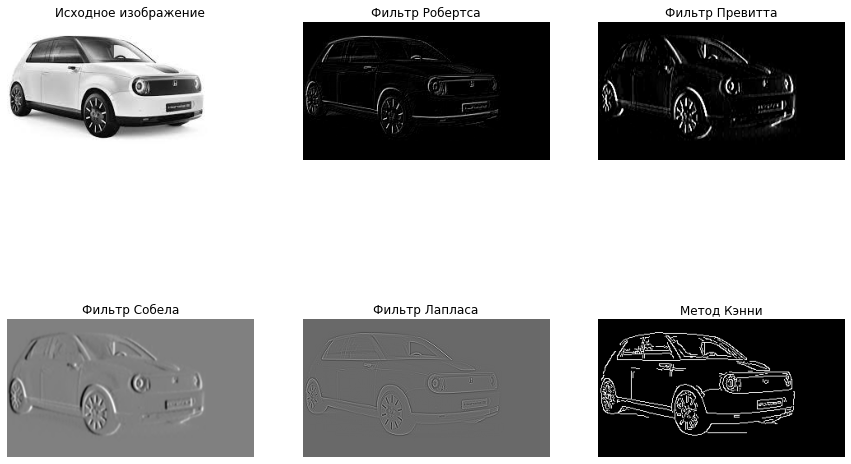

In [131]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Исходное изображение')
axs[0, 1].imshow(edges_roberts, cmap='gray')
axs[0, 1].set_title('Фильтр Робертса')
axs[0, 2].imshow(edges_prewitt_x, cmap='gray')
axs[0, 2].set_title('Фильтр Превитта')
axs[1, 0].imshow(edges_sobel_x, cmap='gray')
axs[1, 0].set_title('Фильтр Собела')
axs[1, 1].imshow(edges_laplace, cmap='gray')
axs[1, 1].set_title('Фильтр Лапласа')
axs[1, 2].imshow(edges_canny, cmap='gray')
axs[1, 2].set_title('Метод Кэнни')


for ax in axs.flat:
    ax.axis('off')

plt.show()


mse for edges Метод Кэнни 50,70 = 52452.673630952384
mse for edges Метод Кэнни 150,170 = 47236.638492063496


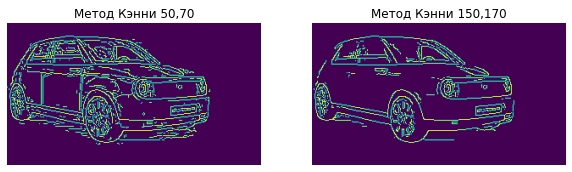

In [132]:
edges_canny_1 = cv2.Canny(image,50,70)

edges_canny_2 = cv2.Canny(image,150,170)

print(f"mse for edges Метод Кэнни 50,70 = {mse(edges_laplace, ideal_image)}")
print(f"mse for edges Метод Кэнни 150,170 = {mse(edges_canny, ideal_image)}")

fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(edges_canny_1)
axs[0].set_title('Метод Кэнни 50,70')
axs[1].imshow(edges_canny_2)
axs[1].set_title('Метод Кэнни 150,170')

# Удаление осей
for ax in axs.flat:
    ax.axis('off')

### 3. Исследование детекторов и дескрипторов

#### 3.1 Обработать изображения с помощью разных методов поиска ключевых точек (SIFT, BRISK, ORB). Отобразить ключевые точки на изображении. Выполнить поиск похожих объектов с помощью дескрипторов данных методов на других изображениях (изображения без и со схожими объектами). Исследовать инвариантность методов относительно преобразования исходного изображения (смещение, поворот, изменение масштаба, изменение яркости, изменение точки положения камеры).

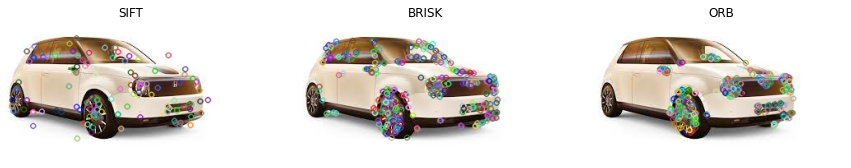

In [133]:
image = cv2.imread(img_path, cv2.COLOR_BGR2RGB)

sift = cv2.SIFT_create()
brisk = cv2.BRISK_create()
orb = cv2.ORB_create()

keypoints_sift, descriptors_sift = sift.detectAndCompute(image, None)
keypoints_brisk, descriptors_brisk = brisk.detectAndCompute(image, None)
keypoints_orb, descriptors_orb = orb.detectAndCompute(image, None)

image_sift = cv2.drawKeypoints(image, keypoints_sift, None)
image_brisk = cv2.drawKeypoints(image, keypoints_brisk, None)
image_orb = cv2.drawKeypoints(image, keypoints_orb, None)

fig, axs = plt.subplots(1, 3, figsize=(15, 10))

axs[0].imshow(image_sift)
axs[0].set_title('SIFT')
axs[1].imshow(image_brisk)
axs[1].set_title('BRISK')
axs[2].imshow(image_orb)
axs[2].set_title('ORB')

for ax in axs.flat:
    ax.axis('off')


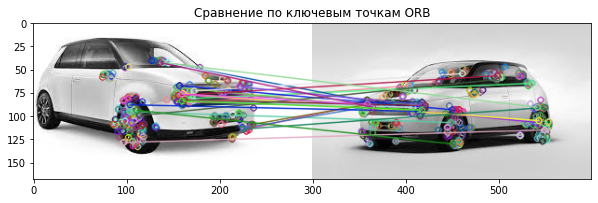

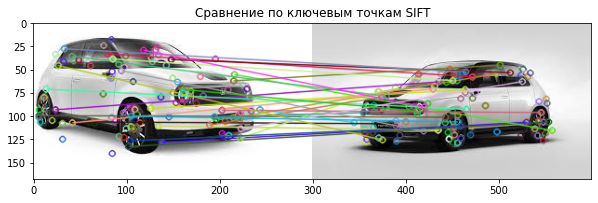

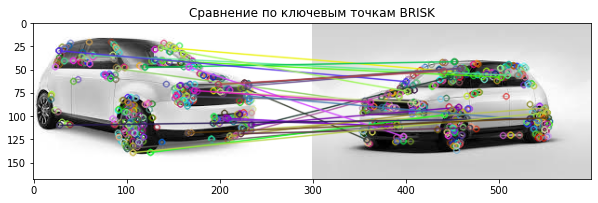

In [134]:
image1 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('Honda_014.jpg', cv2.IMREAD_GRAYSCALE) #00012

orb = cv2.ORB_create()
sift = cv2.SIFT_create()
brisk = cv2.BRISK_create()

detector_dict = {"ORB":orb, "SIFT":sift, "BRISK":brisk,}

def keypoint_compare(detector, image1, image2, text=""):
    keypoints1, descriptors1 = detector.detectAndCompute(image1, None)
    keypoints2, descriptors2 = detector.detectAndCompute(image2, None)

    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    matches = sorted(matches, key=lambda x: x.distance)

    result = cv2.drawMatches(image1, keypoints1, image2,
                            keypoints2, matches[:30], None)
    plt.figure(figsize=(10, 10))
    plt.imshow(result)
    plt.title(f"Сравнение по ключевым точкам {text}")
    plt.show()

for key, value in detector_dict.items():
    keypoint_compare(value, image1, image2, key)

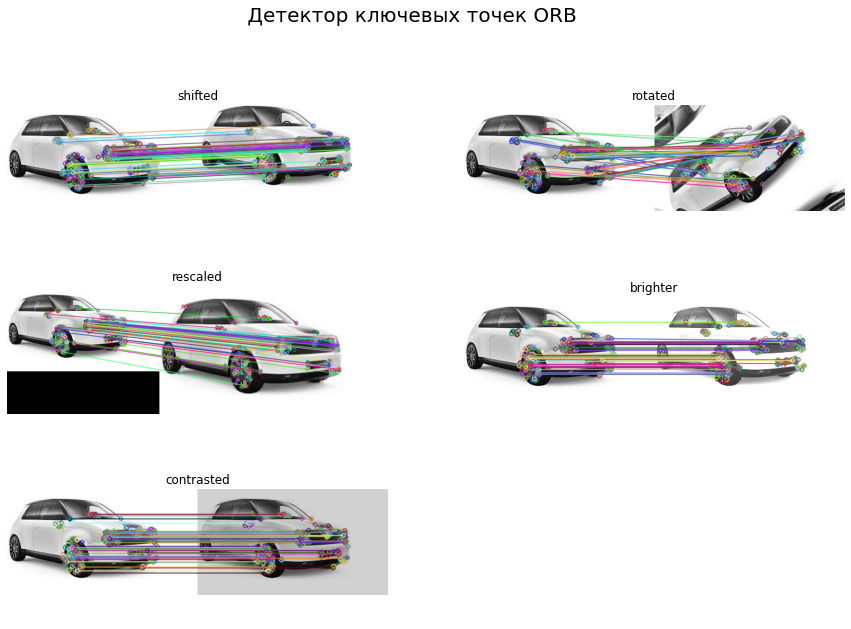

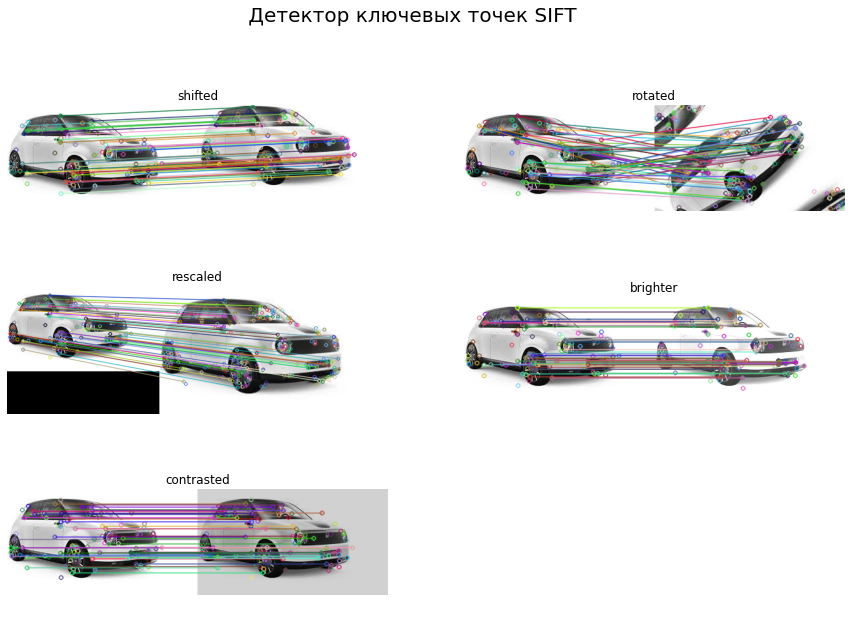

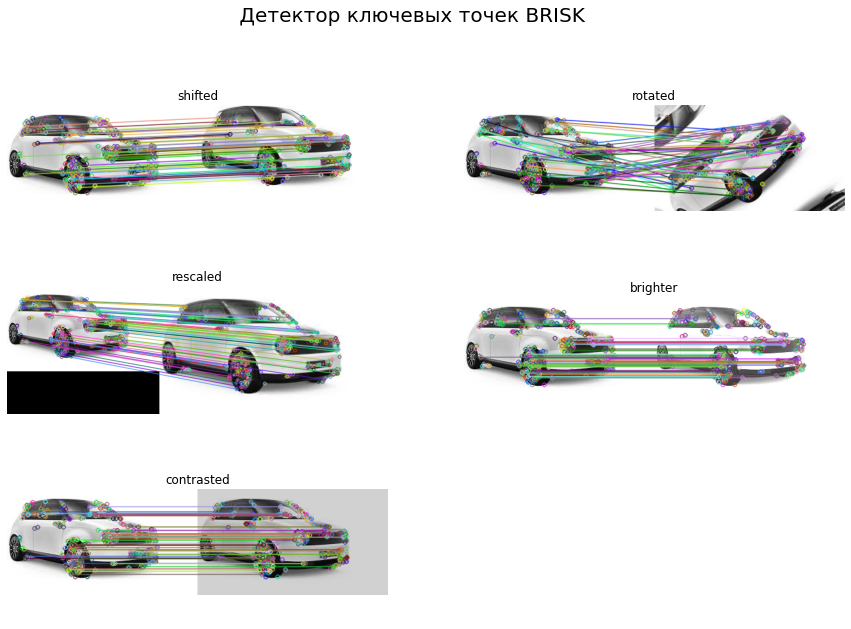

In [135]:
orb = cv2.ORB_create()
sift = cv2.SIFT_create()
brisk = cv2.BRISK_create()
detector_dict = {"ORB":orb, "SIFT":sift, "BRISK":brisk,}

image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
orig_image = image.copy()

def keypoint_detector_plot(detector, name, image, augs):

    keypoints1, descriptors1 = detector.detectAndCompute(image, None)

    translated, rescaled, rotated, brighter, contrasted = augs

    keypoints2, descriptors2 = detector.detectAndCompute(translated, None)
    keypoints3, descriptors3 = detector.detectAndCompute(rotated, None)
    keypoints4, descriptors4 = detector.detectAndCompute(rescaled, None)
    keypoints5, descriptors5 = detector.detectAndCompute(brighter, None)
    keypoints6, descriptors6 = detector.detectAndCompute(contrasted, None)

    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches1 = bf.match(descriptors1, descriptors2)
    matches2 = bf.match(descriptors1, descriptors3)
    matches3 = bf.match(descriptors1, descriptors4)
    matches4 = bf.match(descriptors1, descriptors5)
    matches5 = bf.match(descriptors1, descriptors6)

    matches1 = sorted(matches1, key=lambda x: x.distance)
    matches2 = sorted(matches2, key=lambda x: x.distance)
    matches3 = sorted(matches3, key=lambda x: x.distance)
    matches4 = sorted(matches4, key=lambda x: x.distance)
    matches5 = sorted(matches5, key=lambda x: x.distance)

    result1 = cv2.drawMatches(image, keypoints1, translated, keypoints2, matches1[:50], None)
    result2 = cv2.drawMatches(image, keypoints1, rotated, keypoints3, matches2[:50], None)
    result3 = cv2.drawMatches(image, keypoints1, rescaled, keypoints4, matches3[:50], None)
    result4 = cv2.drawMatches(image, keypoints1, brighter, keypoints5, matches4[:50], None)
    result5 = cv2.drawMatches(image, keypoints1, contrasted, keypoints6, matches5[:50], None)

    fig, axs = plt.subplots(3, 2, figsize=(15, 10))

    axs[0][0].imshow(result1)
    axs[0][0].set_title('shifted')
    axs[0][1].imshow(result2)
    axs[0][1].set_title('rotated')
    axs[1][0].imshow(result3)
    axs[1][0].set_title('rescaled')
    axs[1][1].imshow(result4)
    axs[1][1].set_title('brighter')
    axs[2][0].imshow(result5)
    axs[2][0].set_title('contrasted')
    fig.suptitle(f' Детектор ключевых точек {name} ', fontsize=20)

    for ax in axs.flat:
        ax.axis('off')

transform = A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0, rotate_limit=0, p=1)
translated = transform(image=image)['image']
rescaled = cv2.resize(image, None, fx=1.5, fy=1.5)
transform = A.ShiftScaleRotate(shift_limit=0, scale_limit=0, rotate_limit=45, p=1)
rotated = transform(image=image)['image']
brighter = cv2.convertScaleAbs(image, alpha=1, beta=50)
transform = A.RandomBrightnessContrast(brightness_limit=0, contrast_limit=0.2, p=1)
contrasted = transform(image=image)['image']
augs = [translated, rescaled, rotated, brighter, contrasted]
for key, value in detector_dict.items():
    keypoint_detector_plot(value, key, image, augs)

4 Разработать алгоритм распознавания сетки судоку

In [136]:
import numpy as np
import cv2
import operator
import numpy as np
from matplotlib import pyplot as plt
from digit_recognize import get_digit

def pre_process_image(img, skip_dilate=False):
    proc = cv2.GaussianBlur(img.copy(), (9, 9), 0)

    proc = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    proc = cv2.bitwise_not(proc, proc)

    if not skip_dilate:
        # Dilate the image to increase the size of the grid lines.

        kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]],np.uint8)
        proc = cv2.dilate(proc, kernel)

    return proc


def find_corners_of_largest_polygon(img):
    if cv2.__version__.split('.')[0] == '3':
        _, contours, h = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    else:
        contours, h = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    polygon = contours[0]

    bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
    top_left, _ = min(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
    bottom_left, _ = min(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
    top_right, _ = max(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))

    return [polygon[top_left][0], polygon[top_right][0], polygon[bottom_right][0], polygon[bottom_left][0]]


def distance_between(a, b):
    return np.sqrt(((b[0] - a[0]) ** 2) + ((b[1] - a[1]) ** 2))


def crop_and_warp(img, crop_rect):
    top_left, top_right, bottom_right, bottom_left = crop_rect[0], crop_rect[1], crop_rect[2], crop_rect[3]

    src = np.array([top_left, top_right, bottom_right, bottom_left], dtype='float32')

    side = max([
        distance_between(bottom_right, top_right),
        distance_between(top_left, bottom_left),
        distance_between(bottom_right, bottom_left),
        distance_between(top_left, top_right)
    ])

    dst = np.array([[0, 0], [side - 1, 0], [side - 1, side - 1], [0, side - 1]], dtype='float32')

    m = cv2.getPerspectiveTransform(src, dst)
    return cv2.warpPerspective(img, m, (int(side), int(side)))


def infer_grid(img):
    squares = []
    side = img.shape[:1]
    side = side[0] / 9

    for j in range(9):
        for i in range(9):
            p1 = (i * side, j * side)
            p2 = ((i + 1) * side, (j + 1) * side)
            squares.append((p1, p2))
    return squares


def find_largest_feature(inp_img, scan_tl=None, scan_br=None):
    """
    Uses the fact the `floodFill` function returns a bounding box of the area it filled to find the biggest
    connected pixel structure in the image. Fills this structure in white, reducing the rest to black.
    """
    img = inp_img.copy()
    height, width = img.shape[:2]

    max_area = 0
    seed_point = (None, None)

    if scan_tl is None:
        scan_tl = [0, 0]

    if scan_br is None:
        scan_br = [width, height]

    for x in range(scan_tl[0], scan_br[0]):
        for y in range(scan_tl[1], scan_br[1]):
            if img.item(y, x) == 255 and x < width and y < height:
                area = cv2.floodFill(img, None, (x, y), 64)
                if area[0] > max_area:
                    max_area = area[0]
                    seed_point = (x, y)

    for x in range(width):
        for y in range(height):
            if img.item(y, x) == 255 and x < width and y < height:
                cv2.floodFill(img, None, (x, y), 64)

    mask = np.zeros((height + 2, width + 2), np.uint8)

    if all([p is not None for p in seed_point]):
        cv2.floodFill(img, mask, seed_point, 255)

    top, bottom, left, right = height, 0, width, 0

    for x in range(width):
        for y in range(height):
            if img.item(y, x) == 64:
                cv2.floodFill(img, mask, (x, y), 0)

            if img.item(y, x) == 255:
                top = y if y < top else top
                bottom = y if y > bottom else bottom
                left = x if x < left else left
                right = x if x > right else right

    bbox = [[left, top], [right, bottom]]
    return img, np.array(bbox, dtype='float32'), seed_point


def extract_digit(img, rect):

    digit = img[int(rect[0][1]):int(rect[1][1]), int(rect[0][0]):int(rect[1][0])]

    h, w = digit.shape[:2]
    margin = int(np.mean([h, w]) / 2.5)
    _, bbox, seed = find_largest_feature(digit, [margin, margin], [w - margin, h - margin])
    
    digit = digit[int(bbox[0][1]):int(bbox[1][1]), int(bbox[0][0]):int(bbox[1][0])]

    w = bbox[1][0] - bbox[0][0]
    h = bbox[1][1] - bbox[0][1]

    # Ignore any small bounding boxes
    if w > 0 and h > 0 and (w * h) > 100 and len(digit) > 0:
        return digit
    else:
        return None


def parse_grid(path):
    original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    processed = pre_process_image(original)

    corners = find_corners_of_largest_polygon(processed)
    cropped = crop_and_warp(original, corners)

    squares = infer_grid(cropped)

    img = pre_process_image(cropped.copy(), skip_dilate=True)
    digits = []
    for square in squares:
        digit = extract_digit(img, square)
        if digit is not None:
            digits.append(get_digit(digit))
        else:
            digits.append(0)

    return digits


In [137]:
dataset_path = "C:/Projects/SFU/TVO/pr3_test/sudoku dataset/"
accuracies = []

for image_file in [f for f in os.listdir(dataset_path) if f.endswith('.jpg')]:
    base_name = os.path.splitext(image_file)[0]

    image_path = os.path.join(dataset_path, image_file)
    
    print(f"img -> {image_path}")

    recognized_numbers = parse_grid(image_path)

    recognized_numbers = list(map(int, recognized_numbers))

    dat_file = base_name + '.dat'
    dat_path = os.path.join(dataset_path, dat_file)

    with open(dat_path, 'r') as f:
        lines = f.readlines()[2:]
        real_numbers = [int(num) for line in lines for num in line.split()]

    accuracy = np.sum(np.array(recognized_numbers) == np.array(real_numbers)) / 81.0
    accuracies.append(accuracy)
    
    print(f'Точность {image_file}: {accuracy}')

    print("real:")
    for i in range(9):
        print(real_numbers[9*i:9*i + 9])
    print("recognized:")
    for i in range(9):
        print(recognized_numbers[9*i:9*i + 9])

print(f"Средняя точность = {np.mean(accuracies)}")

img -> C:/Projects/SFU/TVO/pr3_test/sudoku dataset/image1005.jpg
1/1 [==============================] - 0s 28ms/step
Точность image1005.jpg: 1.0
real:
[0, 8, 0, 0, 0, 7, 0, 0, 9]
[1, 0, 0, 0, 0, 0, 6, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 8, 0]
[0, 0, 2, 0, 3, 0, 0, 0, 7]
[0, 0, 0, 2, 1, 4, 0, 0, 0]
[5, 0, 0, 0, 9, 0, 4, 0, 0]
[0, 5, 0, 0, 0, 3, 0, 0, 0]
[0, 0, 4, 0, 0, 0, 0, 0, 3]
[6, 0, 0, 1, 0, 0, 0, 2, 0]
recognized:
[0, 8, 0, 0, 0, 7, 0, 0, 9]
[1, 0, 0, 0, 0, 0, 6, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 8, 0]
[0, 0, 2, 0, 3, 0, 0, 0, 7]
[0, 0, 0, 2, 1, 4, 0, 0, 0]
[5, 0, 0, 0, 9, 0, 4, 0, 0]
[0, 5, 0, 0, 0, 3, 0, 0, 0]
[0, 0, 4, 0, 0, 0, 0, 0, 3]
[6, 0, 0, 1, 0, 0, 0, 2, 0]
img -> C:/Projects/SFU/TVO/pr3_test/sudoku dataset/image1009.jpg
1/1 [==============================] - 0s 26ms/step
Точность image1009.jpg: 1.0
real:
[2, 0, 0, 0, 0, 8, 0, 0, 6]
[0, 8, 0, 0, 2, 0, 0, 1, 0]
[0, 0, 6, 1, 5, 0, 2, 0, 0]
[8, 0, 0, 0, 0, 0, 6, 0, 0]
[0, 2, 1, 0, 0, 0, 8, 5, 0]
[0, 0, 5, 0, 0, 0, 0, 0, 3]
[0, 0, 3, 0, 4